# Vedo_GSDMA_test

In [1]:
import vedo as vd #Plotter, Mesh, Points, Line, Lines, embedWindow #, printc, exportWindow, settings

import matplotlib.colors as mcolors
import random
import pandas as pd
import scipy.spatial as ssp
import numpy as np

vd.embedWindow(False)
#vd.settings.embedWindow(backend='ipyvtk') # to plot in jupyter notebook but very slow !

In [2]:
pwd

'/home/su530201/PycharmProjects/GSDMA/playground/TFE_test'

### Create a plotter

In [3]:
plt3d = vd.Plotter(axes=dict(xtitle='m', ytitle='m', ztitle='m', yzGrid=False), 
                   size=(1000,600)) 

# Test with Borehole3D objects

In [4]:
import matplotlib.pyplot as plt
from striplog import Component, Decor, Legend, Interval, Lexicon
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from definitions import ROOT_DIR

In [5]:
components = [Component({'lithology': 'siltstone', 'colour': 'orange'}),
              Component({'lithology': 'anhydrite', 'colour': 'green'}),
              Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'brown'}),
              Component({'lithology': 'dolomite', 'colour': 'cyan'}),
              Component({'lithology': 'siltstone', 'colour': 'red'}),
              Component({'lithology': 'limestone', 'colour':'yellow'})]
list_of_decors=[]
hatches = ['+', 'x', '.', 's', '*', 'b']
colours = ['#888888', '#882222', '#AAAAAA', '#CC22CC', '#CC2222', '#2222CC']

for i in range(len(components)):
    if hasattr(components[i], 'colour'):
        c = components[i].colour
    else:
        c=colours[i]
    
    if hasattr(components[i], 'hatch'):
        h = components[i].hatch
    else:
        h=hatches[i]
        
    d = {'color': c,
         'hatch': h,
         'component': components[i],
         'width': 3}
    decor = Decor(d)
    list_of_decors.append(decor)
    
legend = Legend(list_of_decors)
lexicon=Lexicon.default()

In [6]:
intervals=[]
top=[0,2,4,6,8,10]
base=[2,4,6,8,10,12]
for i in range(len(components)):     
    intervals.append(Interval(top=top[i], base=base[i], 
                              components=[components[i]],
                              lexicon=lexicon))

In [7]:
bh3D = Borehole3D(intervals, legend=legend, name='BH_test', 
                  x_collar=152300, y_collar=121750, z_collar=101.5)

Borehole geometry created successfully !


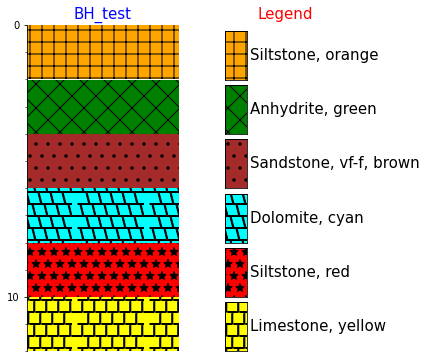

In [8]:
bh3D.log_plot()

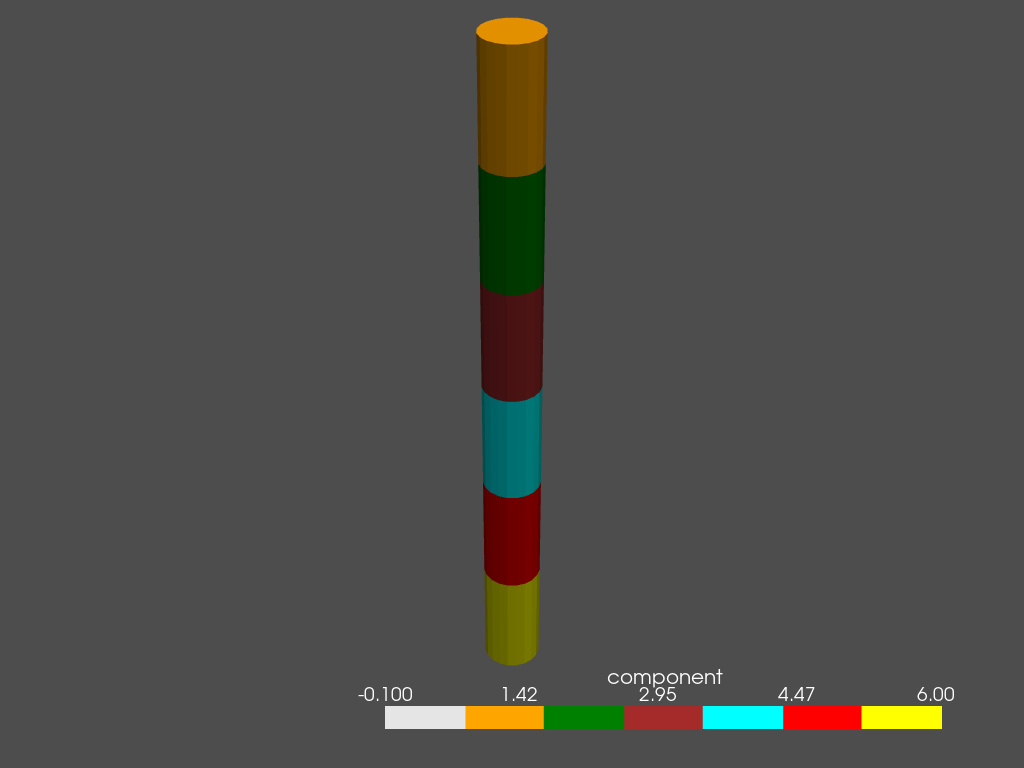

In [9]:
bh3D.plot3d()

In [10]:
bh3D.geometry.geometry.vertices[2]

Vector3([ 1.5230e+05,  1.2175e+05, -2.0000e+00])

In [11]:
import pyvista as pv, omfvista as ov, omf

In [12]:
np.array(bh3D.geometry.geometry.vertices)

array([[ 1.5230e+05,  1.2175e+05, -0.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -2.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -2.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -4.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -4.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -6.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -6.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -8.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -8.0000e+00],
       [ 1.5230e+05,  1.2175e+05, -1.0000e+01],
       [ 1.5230e+05,  1.2175e+05, -1.0000e+01],
       [ 1.5230e+05,  1.2175e+05, -1.2000e+01]])

In [13]:
bh3D_vtk = ov.line_set_to_vtk(bh3D.geometry).tube(radius=0.5)
bh3D_vtk

PolyData (0x7f6305432340)
  N Cells:	132
  N Points:	480
  X Bounds:	1.523e+05, 1.523e+05
  Y Bounds:	1.217e+05, 1.218e+05
  Z Bounds:	-1.200e+01, 0.000e+00
  N Arrays:	3

In [16]:
pv.plot_itk(bh3D_vtk)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [14]:
vd.show(bh3D_vtk)

ViewInteractiveWidget(height=600, layout=Layout(height='auto', width='100%'), width=1000)

In [15]:
bh3D_vtk.points

pyvista_ndarray([[152300.        , 121749.5       ,      0.        ],
                 [152300.1545085 , 121749.52447174,      0.        ],
                 [152300.29389263, 121749.5954915 ,      0.        ],
                 ...,
                 [152299.5954915 , 121749.70610737,    -12.        ],
                 [152299.70610737, 121749.5954915 ,    -12.        ],
                 [152299.8454915 , 121749.52447174,    -12.        ]])